# Bank Customer Churn
- Churn modeling is a method used by businesses to predict the likelihood of customers discontinuing their service or subscription. It helps companies understand customer behavior and implement strategies to improve retention and reduce customer loss.


## Project
The objective of this project is to analyze customer churn at the bank by identifying key behavioral and demographic insights associated with customers who have closed their accounts. Leveraging these insights, the project aims to develop a predictive churn model capable of estimating the likelihood of a customer leaving. This model will enable the bank to proactively identify at-risk customers and implement targeted retention strategies to reduce customer attrition and improve long-term engagement.

## Reference
- Hyperparameter Optimization for XgBoost, Krish Naik
- XGBoost Parameters, geeksforgeeks.org

## Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset
- Kaggle Churn Modelling: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling/data

In [2]:
# Read data file
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
# Display data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# rows, columns
df.shape

(10000, 14)

In [5]:
# columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check for nulls
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# Basic Statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratory Data Analysis - Customers

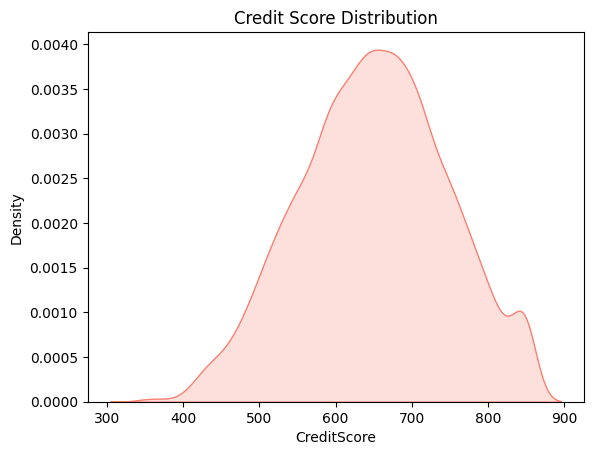

In [9]:
# Distribution of CreditScore values

#sns.histplot(df, x = 'CreditScore', kde=True, color="salmon")
sns.kdeplot(df, x='CreditScore', color='salmon', fill=True)
plt.title("Credit Score Distribution")
plt.show()

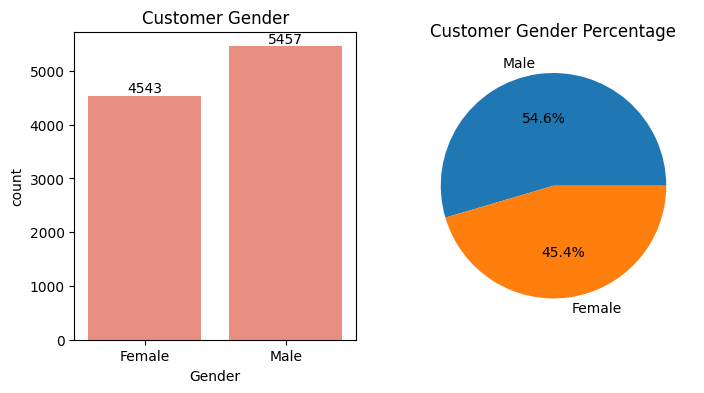

In [10]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax = sns.countplot(df, x='Gender',color="salmon")
ax.bar_label(ax.containers[0])
plt.title("Customer Gender")

plt.subplot(1,2,2)
count_g = df['Gender'].value_counts()
plt.pie(count_g.values, labels=count_g.index, autopct="%1.1f%%",colors=sns.set_palette("hls"))
plt.title("Customer Gender Percentage")
plt.show()

54.6% of customers are male, 45% are female.

<Axes: xlabel='Age', ylabel='Count'>

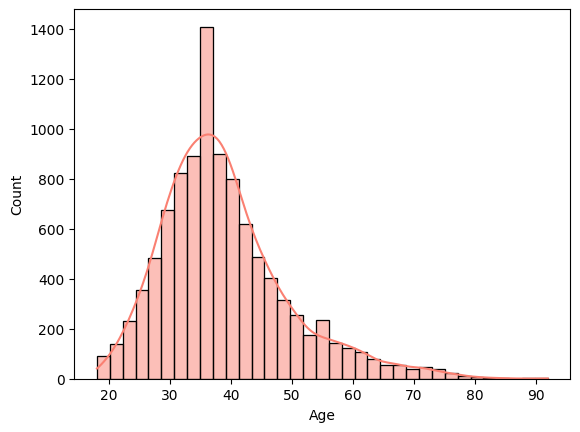

In [11]:
# Distribution of Age
sns.histplot(df, x = 'Age', kde=True, bins=35, color='salmon')

Majority of customers are in the mid-thirties.

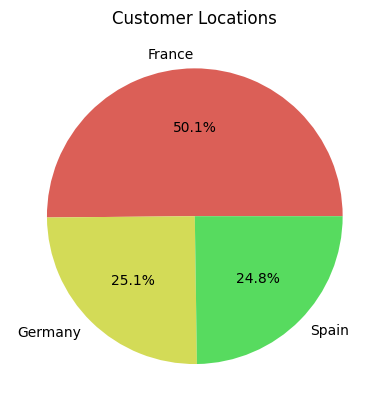

In [12]:
count_active = df['Geography'].value_counts()
plt.pie(count_active.values, labels=count_active.index, autopct="%1.1f%%",colors=sns.set_palette("hls"))
plt.title("Customer Locations")
plt.show()


50% of customers are located in France.

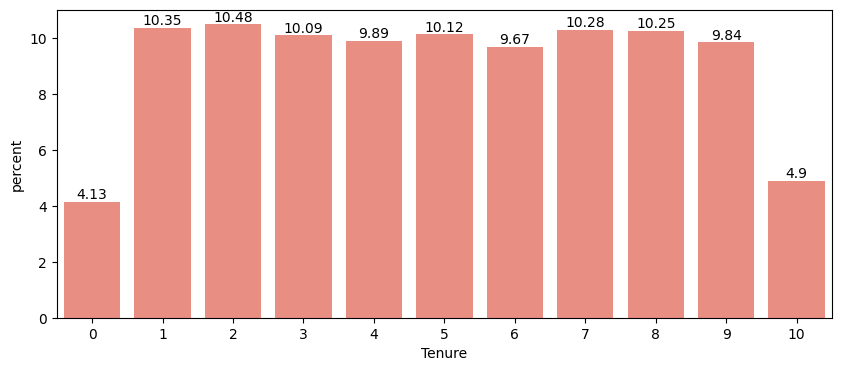

In [13]:
# Distribution of Tenure
plt.figure(figsize=(10,4))
ax = sns.countplot(df, x='Tenure', stat="percent", color="salmon")
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='Balance', ylabel='Count'>

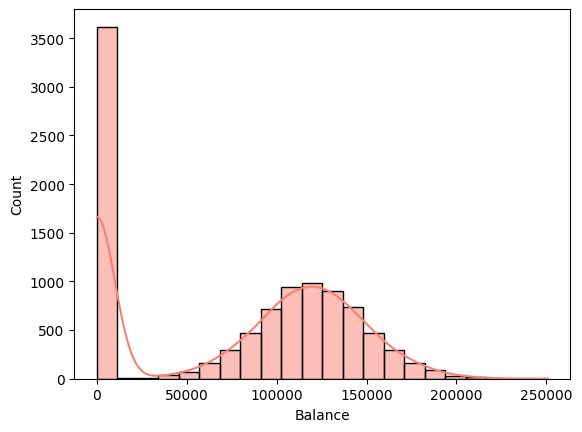

In [14]:
sns.histplot(df, x='Balance', kde=True, color='salmon')

In [15]:
print(f"Average Customer Balance is ${round(df['Balance'].mean())}")

Average Customer Balance is $76486


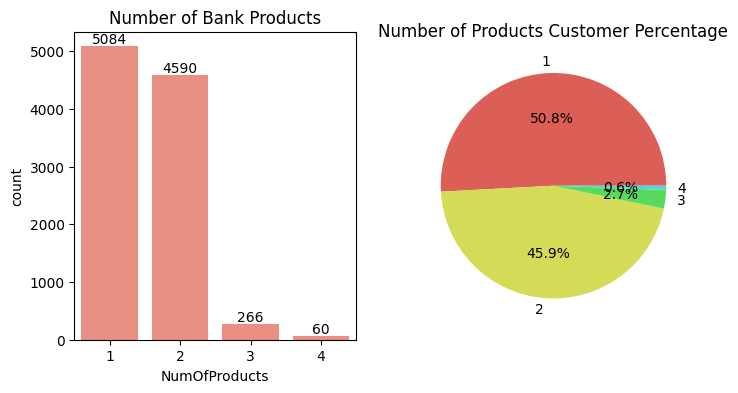

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax = sns.countplot(df, x='NumOfProducts',order=df['NumOfProducts'].value_counts().index, color="salmon")
ax.bar_label(ax.containers[0])
plt.title("Number of Bank Products")

plt.subplot(1,2,2)
count_nop = df['NumOfProducts'].value_counts()
plt.pie(count_nop.values, labels=count_nop.index, autopct="%1.1f%%",colors=sns.set_palette("hls"))
plt.title("Number of Products Customer Percentage")
plt.show()

49% of customers use more than one bank product (i.e checking account, savings account, loan, credit card,etc)

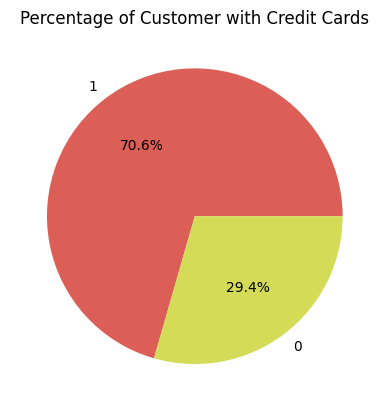

In [17]:
#plt.figure(figsize=(6,6))
count_hcc = df['HasCrCard'].value_counts()
plt.pie(count_hcc.values, labels=count_hcc.index, autopct="%1.1f%%",colors=sns.set_palette("hls"))
plt.title("Percentage of Customer with Credit Cards")
plt.show()

70.6% of customers have a credit card

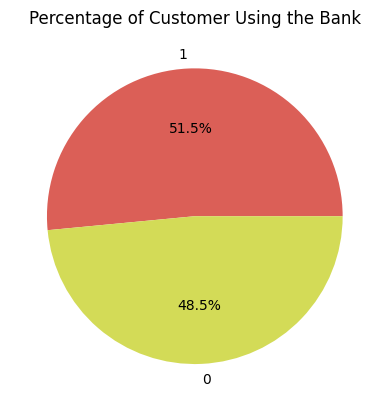

In [18]:
count_active = df['IsActiveMember'].value_counts()
plt.pie(count_active.values, labels=count_active.index, autopct="%1.1f%%",colors=sns.set_palette("hls"))
plt.title("Percentage of Customer Using the Bank")
plt.show()


51.5% of customers are actively using the bank

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

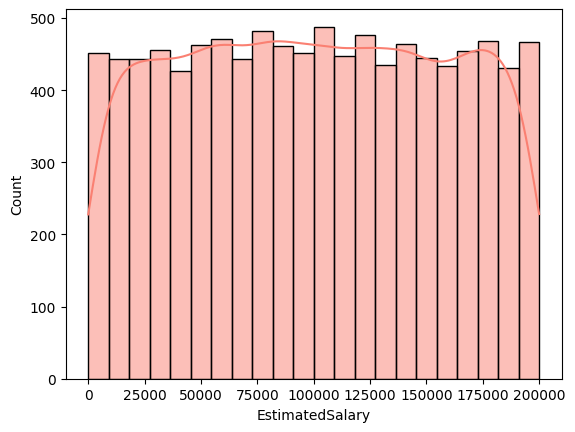

In [19]:
sns.histplot(df, x='EstimatedSalary', kde=True, color='salmon')

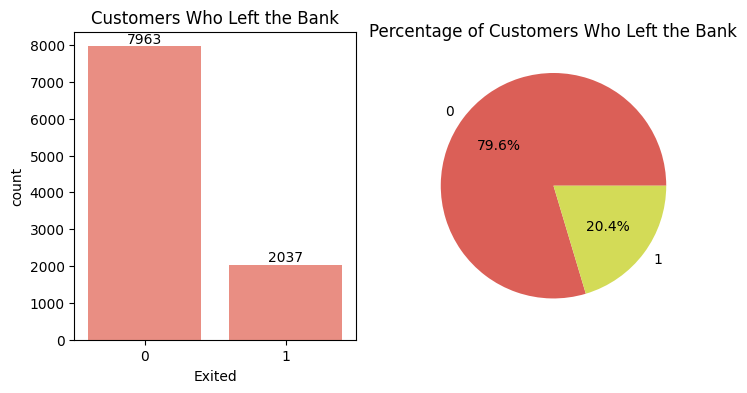

In [20]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax = sns.countplot(df, x='Exited',order=df['Exited'].value_counts().index, color="salmon")
ax.bar_label(ax.containers[0])
plt.title("Customers Who Left the Bank")

plt.subplot(1,2,2)
count_ex = df['Exited'].value_counts()
plt.pie(count_ex.values, labels=count_ex.index, autopct="%1.1f%%",colors=sns.set_palette("hls"))
plt.title("Percentage of Customers Who Left the Bank")
plt.show()

20.4% of customers left the bank.

## Exploratory Data Analysis - Exited Customers

In [21]:
df_exited = df[df['Exited'] ==1].copy(deep=True)

In [22]:
df_exited.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


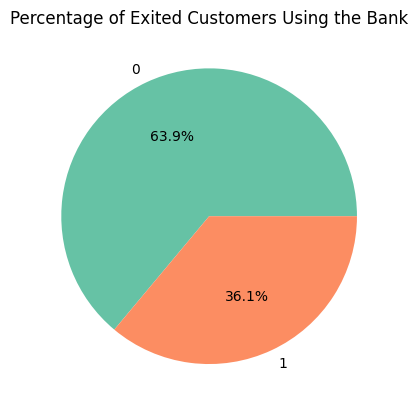

In [23]:
count_active = df_exited['IsActiveMember'].value_counts()
plt.pie(count_active.values, labels=count_active.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"))
plt.title("Percentage of Exited Customers Using the Bank")
plt.show()

In [24]:
print("64% of Exited Customers did not use the bank")

64% of Exited Customers did not use the bank


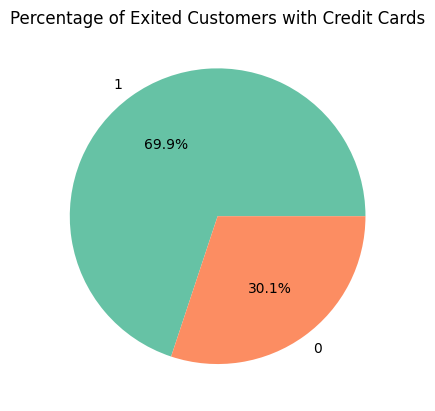

In [25]:
count_ehcc = df_exited['HasCrCard'].value_counts()
plt.pie(count_ehcc.values, labels=count_ehcc.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"))
plt.title("Percentage of Exited Customers with Credit Cards")
plt.show()

In [26]:
print("70% of Exited Customers have a credit card.")

70% of Exited Customers have a credit card.


In [27]:
# Average Tenure of Exited Customers
print(f"Average Tenure of Exited Customers is {round(df_exited['Tenure'].mean())} years. Average Tenure of Customers is {round(df['Tenure'].mean())} years.")


Average Tenure of Exited Customers is 5 years. Average Tenure of Customers is 5 years.


In [28]:
# Average Age of Exited Customers
print(f"Average Age of Exited Customers is {round(df_exited['Age'].mean(),0)} years. Average Age of Customers is {round(df['Age'].mean())} years.")

Average Age of Exited Customers is 45.0 years. Average Age of Customers is 39 years.


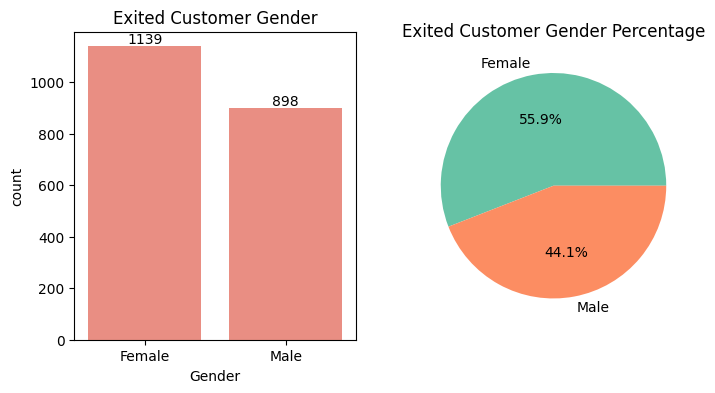

In [29]:
# Exited Customers Gender
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax = sns.countplot(df_exited, x='Gender',color="salmon")
ax.bar_label(ax.containers[0])
plt.title("Exited Customer Gender")

plt.subplot(1,2,2)
count_g = df_exited['Gender'].value_counts()
plt.pie(count_g.values, labels=count_g.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"))
plt.title("Exited Customer Gender Percentage")
plt.show()

In [30]:
print("55.9% of Exited customers are female, 44.1% are male.")

55.9% of Exited customers are female, 44.1% are male.


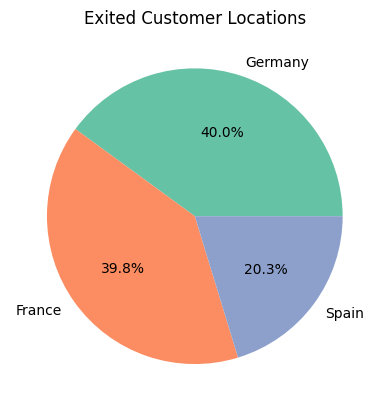

In [31]:
# Exited Customers Location
count_active = df_exited['Geography'].value_counts()
plt.pie(count_active.values, labels=count_active.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"))
plt.title("Exited Customer Locations")
plt.show()

In [32]:
print("80% of the exited customers were from France (40%) and Germany (40%).  25% of customers are from Germany.")

80% of the exited customers were from France (40%) and Germany (40%).  25% of customers are from Germany.


In [33]:
print(f"Average Balance of Exited Customers is ${round(df_exited['Balance'].mean())}, compared to ${round(df['Balance'].mean())} for Bank customers.")

Average Balance of Exited Customers is $91109, compared to $76486 for Bank customers.


In [34]:
print(f"Average Credit Score of Exited Customers: {round(df_exited['CreditScore'].mean())}. Average Credit Score of Customers : {round(df['CreditScore'].mean())}")

Average Credit Score of Exited Customers: 645. Average Credit Score of Customers : 651


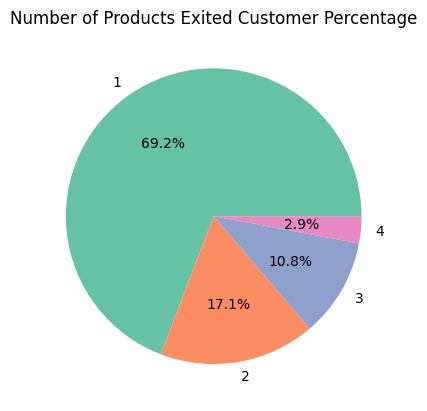

In [35]:
count_enop = df_exited['NumOfProducts'].value_counts()
plt.pie(count_enop.values, labels=count_enop.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"))
plt.title("Number of Products Exited Customer Percentage")
plt.show()

In [36]:
print("31% of exited customers used more than one bank product while 49% of customers used more than on bank product.")

31% of exited customers used more than one bank product while 49% of customers used more than on bank product.


In [37]:
print(f"Estimated Salary of exited customers is ${round(df_exited['EstimatedSalary'].mean())}.  Estimated Salary of customers is ${round(df['EstimatedSalary'].mean())}.")

Estimated Salary of exited customers is $101466.  Estimated Salary of customers is $100090.


## Correlation

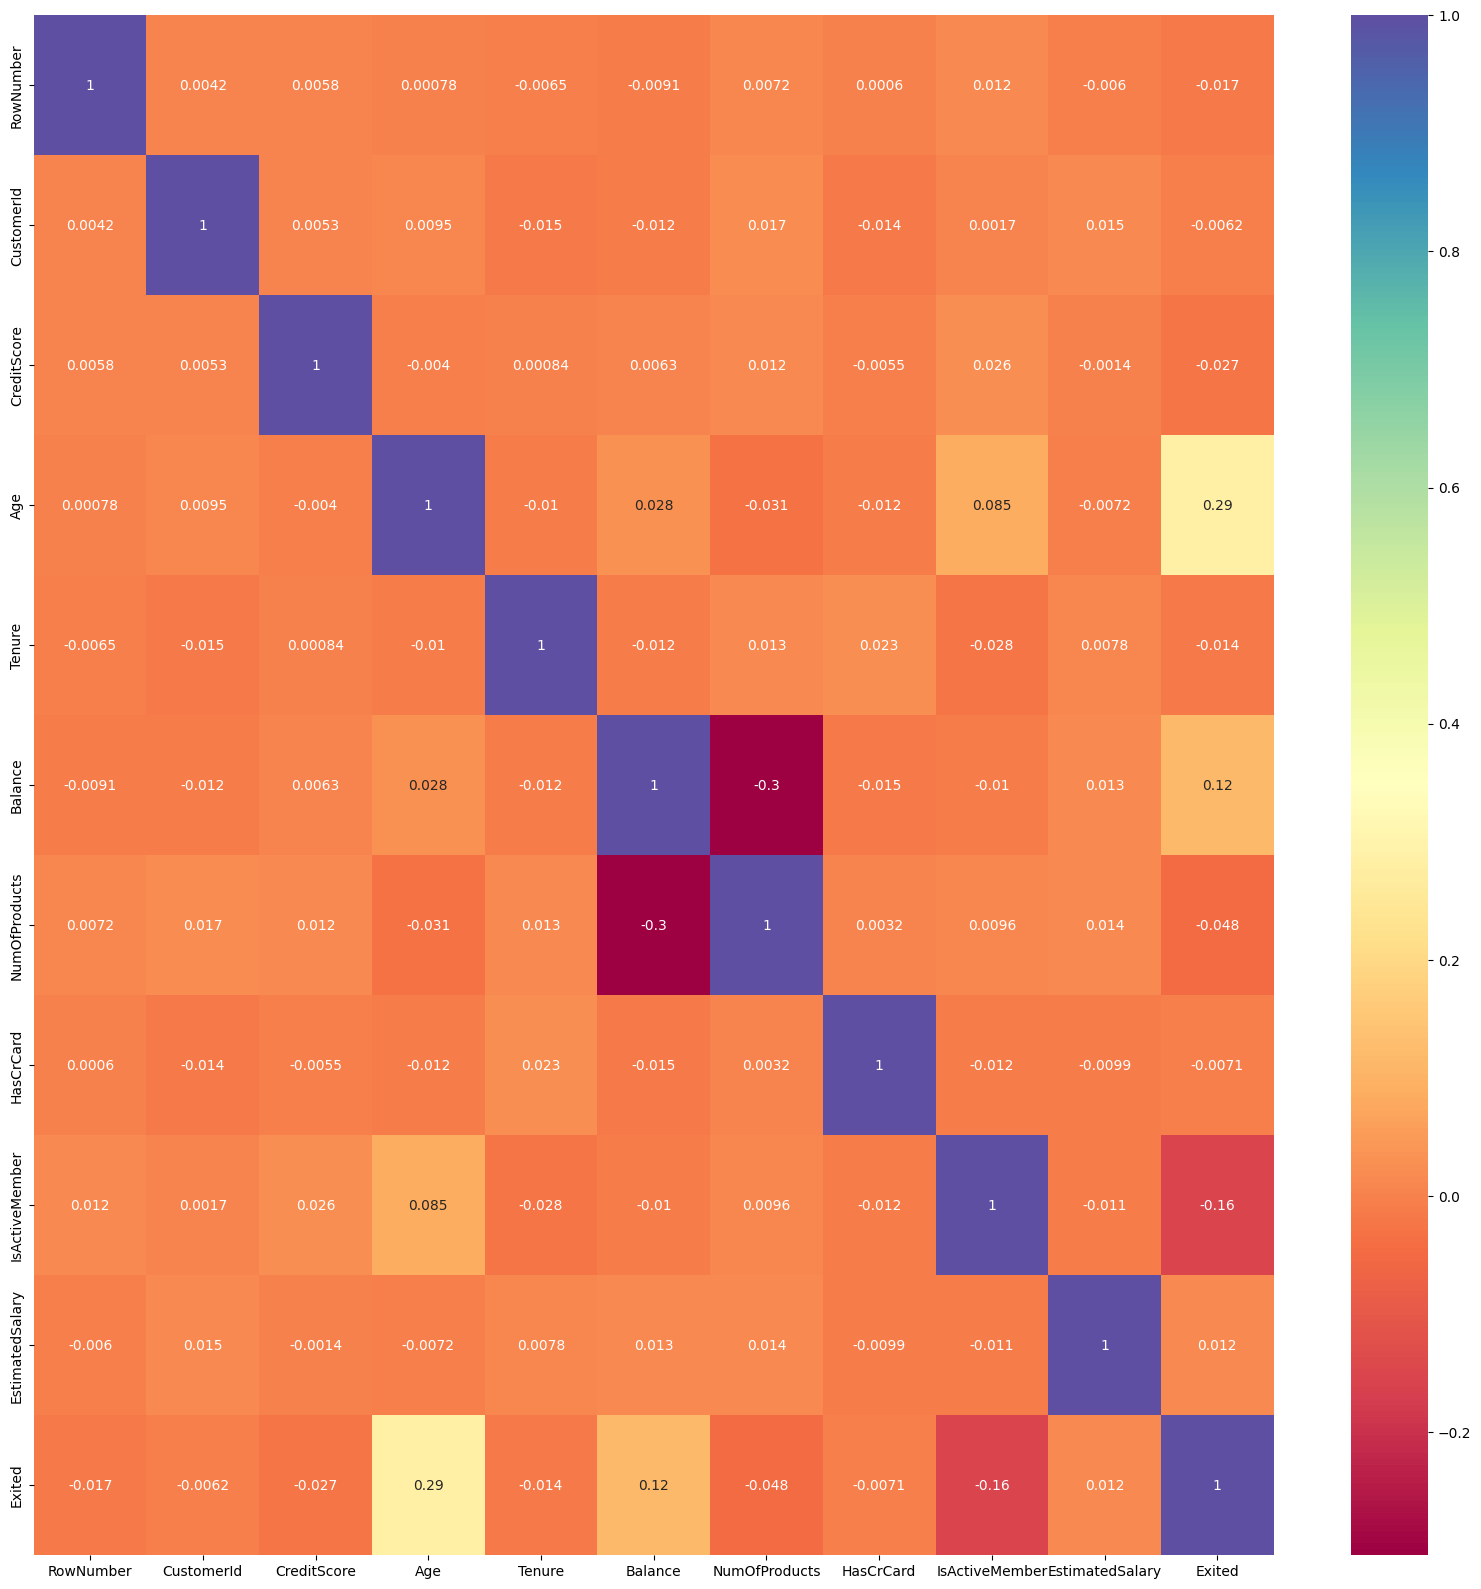

In [38]:
## Correlation

# get correlations of each feature in dataset
corrmat = df.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map

g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap="Spectral")


## Split into Features & Target (Exited)

In [39]:
# Get Features and Target (Exited)
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [40]:
# Shape
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [41]:
# Features

X.head(7)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80


In [42]:
# Target
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


## Feature Engineering

In [43]:
# Geography & Gender are not numeric. Encode pd.get_dummies
X = pd.get_dummies(X, columns = ['Geography','Gender'], drop_first=True, dtype=int)

In [44]:
#
X.head(7)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1


## Hyperparameter Optimization

In [45]:
# Hyperparameter Optimization

params = {
    "learning_rate"   : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"       : [3,4,5,6,8,10,12,15],
    "min_child_weight": [1,3,5,7],
    "n_estimators"    : [100,200,300],
    "subsample"       : [0.6, 0.8, 1.0],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
    }

In [46]:
# Hyperparameter optimization using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb

In [47]:
# Create XgBoost Classifier
classifier = xgb.XGBClassifier()

In [48]:
# Create the Random Search object
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring="roc_auc", n_jobs=-1,cv=5,verbose=3)

In [49]:
# Fit Random Search to data
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=3)

In [50]:
# display best values for params
random_search.best_params_


{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.3,
 'colsample_bytree': 0.4}

In [51]:
# display score

print("Best Score: ", random_search.best_score_)

Best Score:  0.8554811883262776


## Split into Train and Test


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## XgBoost Model

In [54]:
# Model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    min_child_weight=3,
    subsample=1.0,
    colsample_bytree=0.3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:53:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [55]:
from sklearn.metrics import accuracy_score

# Prediction
preds = xgb_model.predict(X_test)

# Evaluation
accuracy= accuracy_score(y_test,preds)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 87.03333333333333


## Model Results

XgBoost model returned an accuracy of 87%.  

## Model Feature Importance

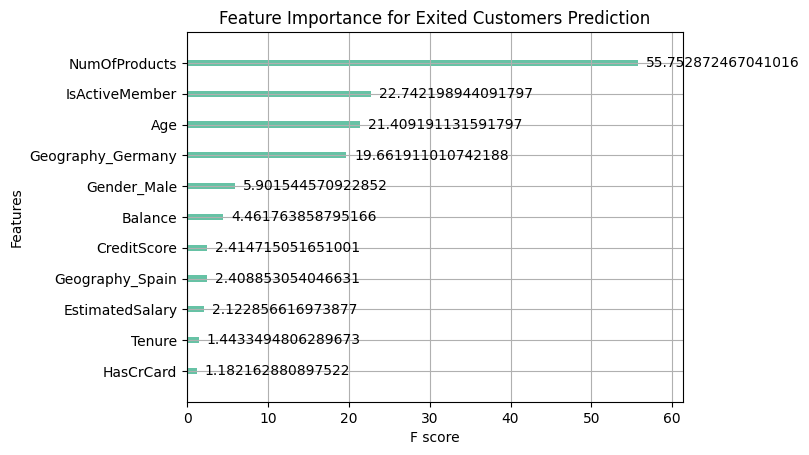

In [64]:
from xgboost import plot_importance
# Plot gain-based feature importance
plot_importance(xgb_model, importance_type='gain')
plt.title("Feature Importance for Exited Customers Prediction")
plt.show()

Gain-based feature importance measures the improvement in model accuracy or the reduction in error when a feature is used to split data within a tree. The features that contributed the most to the model's accuracy are NumofProducts, IsActiveMember, Age, and Geography_Germany.

## Model Predictions

In [57]:
# model predictions using X_test data
print(preds[:15])

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]


In [58]:
# y_test values: Exited values associated with X_test data
print(y_test[:15])

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
2750    1
7487    1
5272    1
5653    0
3999    0
Name: Exited, dtype: int64


The model correctly predicted 14 of 15 y_test values.

# Model Predictions with New Data

In [59]:
# Create new data the model has not seen
data = {
'CreditScore': [619,750, 545],
'Age':[22,35,58],
'Tenure':[1,4,8],
'Balance': [3500, 25870, 65800],
'NumOfProducts':[1,3,4],
'HasCrCard':[0,1,1],
'IsActiveMember': [1,1,1],
'EstimatedSalary': [101500,95750,135680],
'Geography_Germany': [1,0,0],
'Geography_Spain': [0,1,0],
'Gender_Male':[1,0,1]
}


In [60]:
# Create a data frame
df_atrisk = pd.DataFrame(data)

In [61]:
# Display new data
df_atrisk

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,22,1,3500,1,0,1,101500,1,0,1
1,750,35,4,25870,3,1,1,95750,0,1,0
2,545,58,8,65800,4,1,1,135680,0,0,1


In [62]:
# Make new predictions based on the new data
new_preds = xgb_model.predict(df_atrisk)
new_preds


array([0, 1, 1])

The model predicts the first customer will stay and the second and third customers will leave.

In [63]:
# Calculate the probability for each prediction

probabilities = xgb_model.predict_proba(df_atrisk)
cust_predict = pd.DataFrame(probabilities, columns=['Probability of Not Leaving', 'Probability of Leaving'])
cust_predict

,Probability of Not Leaving,Probability of Leaving
0,0.909703,0.090297
1,0.473286,0.526714
2,0.048127,0.951873


Based on the probability results, there is a 91% probability that the first customer will stay, a 53% probability that the second customer will leave, and 95% probability that the third customer will leave.

## Exited Customers
- 20% of customers left the bank

## Characteristics of Exited Customers

- 64% did not use the bank
- 70% had a credit card
- Average tenure was 5 years which is the same for all customers.
- 55.9% female, 44% male.  45% of customers are female.
- Average age was 45 years which was 6 years older than the average for customers.
- 80% were located were Germany (40%) and France (40%).  25% of the bank's customers are located in Germany.
- The average balance for Exited Customer was \$91,109  while the average for customers was \$76,486.
- 31% used more than one bank product while 49% of customers used more than one bank product.



## Recommendations

- Create a user interface that will allow the enduser to enter parameters and receive a prediction with a probability.
- Based on the predictions, create incentives that would help the customer to stay with the bank.
- Investigate why so many customers in Germany are leaving the bank.
- Monitor customer activity and develop a program to reach out to customers that are not engaging with the bank on a regular basis.
- Set a goal for customers to have more than one bank product
- Why are female customers leaving in a greater proportion than male customers?



## Limitations
- Did not address imbalance between customers who stayed and customers who left the bank